In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import joblib
import string

In [44]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [45]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [46]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [47]:
fake['class']=0
true['class']=1

In [48]:
data = pd.concat([fake,true], axis = 0)

In [49]:
data.sample(10)

,title,text,subject,date,class
17385,Germany's Gabriel warns of military escalation...,LUXEMBOURG (Reuters) - German Foreign Minister...,worldnews,"October 16, 2017",1
7628,New Republican SCOTUS Tactic: Who Needs 9 Jus...,In a desperate bid to normalize the Republican...,News,"March 8, 2016",0
20072,U.S.-backed forces not planning on entering De...,WASHINGTON (Reuters) - U.S.-backed militias fi...,worldnews,"September 14, 2017",1
22208,"If You Answer ‘Yes’ to These FBI Questions, Th...",21st Century Wire says As 21WIRE has previousl...,US_News,"February 17, 2017",0
20350,United States says Cambodian accusations all f...,PHNOM PENH (Reuters) - The U.S. ambassador to ...,worldnews,"September 12, 2017",1
3285,Coalition of 13 states to challenge Trump on v...,WASHINGTON (Reuters) - New York State’s attorn...,politicsNews,"June 9, 2017",1
16776,BLUNT MEME EXPOSES Difference Between Forced G...,2 Corinthians 9:7 Each one must give as he ha...,Government News,"Feb 8, 2016",0
18460,TUCKER CARLSON UNLOADS On Dem Strategist Who P...,Tucker Carlson debated a New Jersey Democratic...,left-news,"Jun 20, 2017",0
9631,Michelle Obama helps Prince Harry launch secon...,"ORLANDO, Florida (Reuters) - Britain’s Prince ...",politicsNews,"May 9, 2016",1
4891,"Republicans split, conservatives angry as heal...",WASHINGTON (Reuters) - Deeply divided Republic...,politicsNews,"March 16, 2017",1


In [50]:
data = data.drop(["title","subject","date"], axis = 1)

In [51]:
data.reset_index(inplace=True)

In [52]:
data.drop(['index'],axis = 1,inplace=True)

In [53]:
data.sample(10)

,text,class
7799,Just days after Melissa Harris-Perry wrote a s...,0
17883,"During game 1 of the WNBA Finals, the LA Spark...",0
3214,CNN host Kate Bolduan sat quietly as a conserv...,0
27500,TAIPEI (Reuters) - Taiwan’s presidential offic...,1
26523,WASHINGTON (Reuters) - In a highly unusual int...,1
16939,UPDATE: A leading Supreme Court analyst thinks...,0
2886,In another attempt to stifle freedom of expres...,0
38028,"MOSCOW (Reuters) - Russia s foreign minister, ...",1
9485,MELANIA TRUMP never hesitates to call someone ...,0
3405,"Just a few days ago, President-elect Donald Tr...",0


C:\Users\HP\AppData\Local\Temp\ipykernel_14020\750660786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=data, palette="Set1")


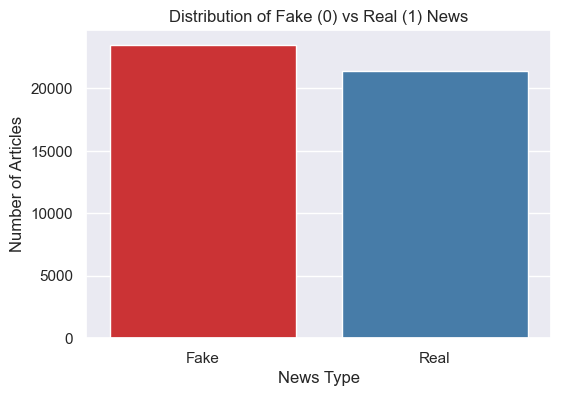

In [54]:
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(6,4))
sns.countplot(x="class", data=data, palette="Set1")
plt.title("Distribution of Fake (0) vs Real (1) News")
plt.xlabel("News Type")
plt.ylabel("Number of Articles")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)                             
    text = re.sub(r'https?://\S+|www\.\S+', '', text)              
    text = re.sub(r'<.*?>+', '', text)                             
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', ' ', text)                               
    text = re.sub(r'\w*\d\w*', '', text)                           
    return text


In [56]:
data["text"]=data["text"].apply(clean_text)

In [57]:
data.sample(10)

,text,class
1020,donald trump is now trying to tweet his way ou...,0
12585,,0
11378,veteran democratic operative donna brazile fin...,0
40269,valletta reuters thousands of maltese called ...,1
14516,enough is enough german citizens are witnessin...,0
12376,,0
5424,donald trump is only one day into his republic...,0
39516,tokyo reuters a japanese man was arrested on ...,1
4462,charlotte north carolina girl zianna oliphant...,0
44762,sydney reuters the countries committed to th...,1


In [58]:
x=data["text"]
y=data["class"]

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [59]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(xtrain)
xv_test = vectorizer.transform(xtest)

In [60]:
lr = LogisticRegression()
lr.fit(xv_train,ytrain)

LogisticRegression()

In [61]:
prediction = lr.predict(xv_test)
lr.score(xv_test,ytest)

0.985924276169265

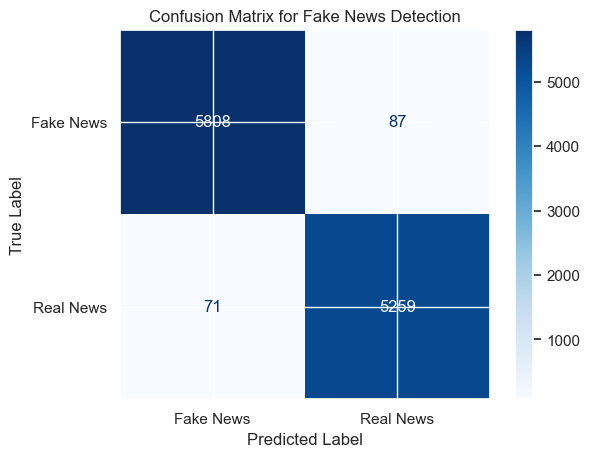

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake News", "Real News"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Fake News Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [63]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [64]:
joblib.dump(vectorizer,"vectorizer.jb")
joblib.dump(lr,"lr_model.jb")

['lr_model.jb']